<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Exercícios de Aprendizagem de Máquina</font>

 Essa lista de exercícios foi criada para que vocês possam aplicar os conhecimentos que vocês adquiriram na aula que assistiram.

Podem tirar dúvidas com **Tales Nobre** e **Felipe Duarte** quando quiserem!
**O prazo de envio do notebook é até a reunião da próxima semana, até 1 hora antes da reunião, podem enviar colocar o conteúdo na branch de vocês do repositório**



🌍 [Link do drive com o Dataset](https://drive.google.com/drive/folders/1xi7m5gzJflujzoDvkPMkRO28SlR4139n?usp=sharing)


### **Objetivos**


*   Entender o nível de conhecimento individual de vocês
*   Estimular vocês a praticarem as formas básicas de avaliar um modelo


### **Observações**



*   Façam uma cópia desse notebook e realizem as questões.
*   Foquem no espaço de *Conclusões*, que aparece no final de cada questão, para explicar as conclusões que vocês chegaram a partir da análise de dados.
*   É recomendável que vocês acessem os materiais de apoio que serão disponibilizados em seguida.
*   Prezem pela organização, é muito importante explicar cada etapa de execução, principalmente no contexto de análise de dados.
*   Claro que vocês não vão precisam importar várias vezes as bibliotecas dentro de um mesmo notebook, mas por fins educativos é recomendado que vocês façam isso nessa lista de exercícios!
*   As questões são progressivas, ou seja, a quantidade de instruções e o nível de dificuldade mudarão ao longo da lista. **Lembre-se de manter o mesmo padrão em todas as questões.**
*  Divida em quantas células e caixas de texto quiser, afim de deixar a legibilidade do código a melhor possível.



Lembrem-se, a prática leva à perfeição!🧠

# **Questão 1: Doenças Cardíacas**




Use Acurácia, F1 Score, Matriz de confusão e Loss function para avaliar o desempenho do modelo.

## Dataset (Não precisam mexer)

In [2]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


# evalue measures
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Completed.')

Completed.


In [3]:
df = pd.read_csv("Data/heart.csv")
df.columns # Ver quais colunas temos para trabalhar (features)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
df.dropna(inplace=True)

In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X

array([[1., 1., 1., ..., 9., 4., 3.],
       [0., 0., 0., ..., 7., 6., 1.],
       [1., 1., 1., ..., 9., 4., 8.],
       ...,
       [0., 0., 1., ..., 2., 5., 2.],
       [1., 0., 1., ..., 7., 5., 1.],
       [1., 1., 1., ..., 9., 6., 2.]])

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # convert each label in the original dataset to the unique integer
y

array([0, 0, 0, ..., 0, 0, 1])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (190260, 21)
y_train:  (190260,)
---
X_test:  (63420, 21)
y_test:  (63420,)


## Regresão Logística

In [8]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)


### Avaliação

In [9]:
# Acurácia simples
accuracy = accuracy_score(y_test, y_pred) # Entre o Teste e a Predição feita com Regrressão Logística
print("Accuracy:", accuracy)

Accuracy: 0.9068274992116052


In [10]:
# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

F1-Score: 0.5745504822279645


In [11]:
# Loss Function
loss_func = log_loss(y_test, y_pred)
print(loss_func)

3.358277323814148


In [12]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56779   746]
 [ 5163   732]]


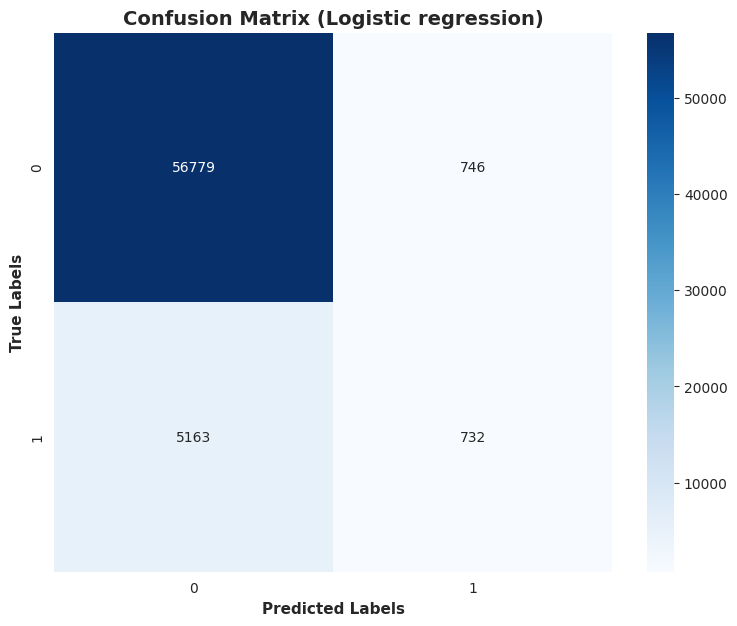

In [13]:
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels", fontweight="bold", fontsize=11)
plt.ylabel("True Labels", fontweight="bold", fontsize=11)
plt.title("Confusion Matrix (Logistic regression)", fontweight="bold", fontsize=14)
plt.show()

## Rede Neural

In [14]:
neural_network_model = MLPClassifier()
neural_network_model.fit(X_train, y_train)

y_pred = neural_network_model.predict(X_test)


### Avaliação

In [15]:
# Acurácia simples
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9086092715231788


In [16]:
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.09747742136406104


In [17]:
# Loss Function
loss_func = log_loss(y_test, y_pred)
print("Loss function:", loss_func)

Loss function: 3.294055740197462


In [18]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[57311   214]
 [ 5582   313]]


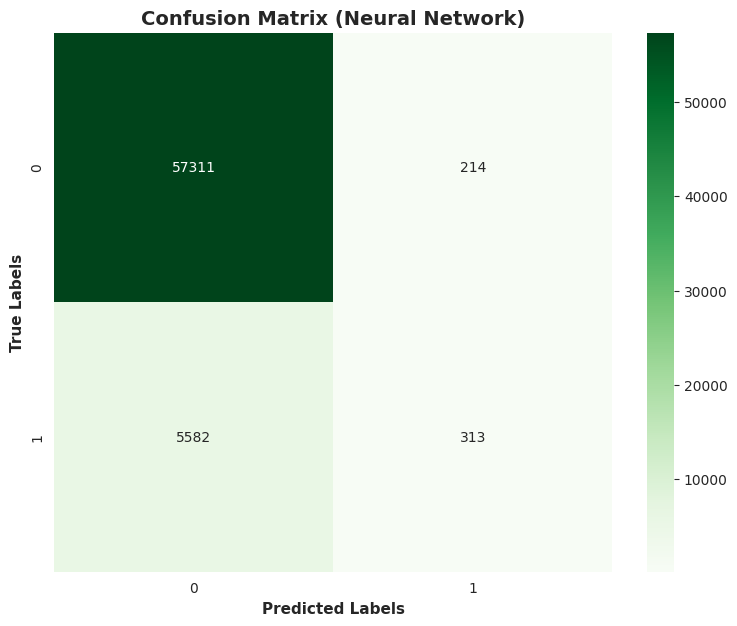

In [20]:
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels", fontweight="bold", fontsize=11)
plt.ylabel("True Labels", fontweight="bold", fontsize=11)
plt.title("Confusion Matrix (Neural Network)", fontweight="bold", fontsize=14)
plt.show()

## Conclusão

In [ ]:
conclusao = """
Podemos ver a partir da análise da Matriz de Confusão que tanto o modelo de Regressão Logística, quanto o modelo de Rede Neural obtiveram praticamente os mesmos resultados sobre a amostra. Poderiamos ver outros métodos de análise para identificar possíveis divergências entre os modelos

print(conclusao)

# **Questão 2: Raças de cachorro**




Use Acurácia, F1 Score, Matriz de confusão e Loss function para avaliar o desempenho do modelo.

### Dataset (Não precisam mexer)

In [ ]:
df = pd.read_csv("local-do-csv-dogs")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("group", axis=1), df["group"], test_size=0.25, random_state=42)



## Nayve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB #nb normal (sem ser gaussiano)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

model = GaussianNB()

model.fit(X_train, y_train)
predicted = model.predict(X_test)


### Avaliação

## Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42, max_iter=1000).fit(X_train, y_train)

### Avaliação

## Conclusão

In [ ]:
conclusao = """
escreva sua conclusão aqui
"""

print(conclusao)